In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def steepest(c, Q, x0, maxiter=100):
    x = x0
    beta = np.max(np.abs(np.linalg.eigvals(Q)))
    results = [np.linalg.norm(Q.dot(x) + c)]
    for _ in range(maxiter):
        g = Q.dot(x) + c
        x = x - 1 / beta * g
        results.append(np.linalg.norm(Q.dot(x) + c))
    return x, results

def accel_steepest_qp(c, Q, x0, maxiter=100):
    beta = np.max(np.linalg.eigvals(Q))
    x = x0
    lambda0 = 0
    lambda1 = 1
    xt1 = x
    results = [np.linalg.norm(Q.dot(x) + c)]
    for _ in range(1, maxiter + 1):
        lambda2 = (1 + np.sqrt(1 + 4 * lambda1**2)) / 2
        alpha = (1 - lambda1) / lambda2
        g = Q.dot(x) + c
        xt2 = x - (1 / beta) * g
        x = (1 - alpha) * xt2 + alpha * xt1
        lambda1 = lambda2
        xt1 = xt2
        results.append(np.linalg.norm(Q.dot(x) + c))
    return x, results

def BBsteepestqp(c, Q, x0, maxiter=100):
    # Initialize variables
    x = x0
    xx = np.zeros_like(x)
    gg = c
    
    results = [np.linalg.norm(Q @ x + c)]
    
    # Iteration process
    for _ in range(maxiter):
        g = Q @ x + c
        
        # if np.linalg.norm(g) <= 1e-12:
        #     result = np.linalg.norm(g)
        #     results.append(result)
        #     return results
        
        deltax = x - xx
        deltag = g - gg
        xx = x
        gg = g
        alpha = (deltax.T @ deltag) / (deltag.T @ deltag)
        x = x - alpha * g
        results.append(np.linalg.norm(Q @ x + c))
    return x, results

def line_steepest(Q, c, x0, maxiter=100):
    beta = np.max(np.abs(np.linalg.eigvals(Q)))
    x = x0
    results = [np.linalg.norm(Q.dot(x) + c)]
    for _ in range(maxiter):
        g = Q.dot(x) + c
        alpha = (g.T.dot(g)) / (g.T.dot(Q.dot(g)))
        x = x - alpha * g
        results.append(np.linalg.norm(Q.dot(x) + c))
    return x, results

/tmp/ipykernel_19004/4143520646.py:50: RuntimeWarning: invalid value encountered in scalar divide
  alpha = (deltax.T @ deltag) / (deltag.T @ deltag)


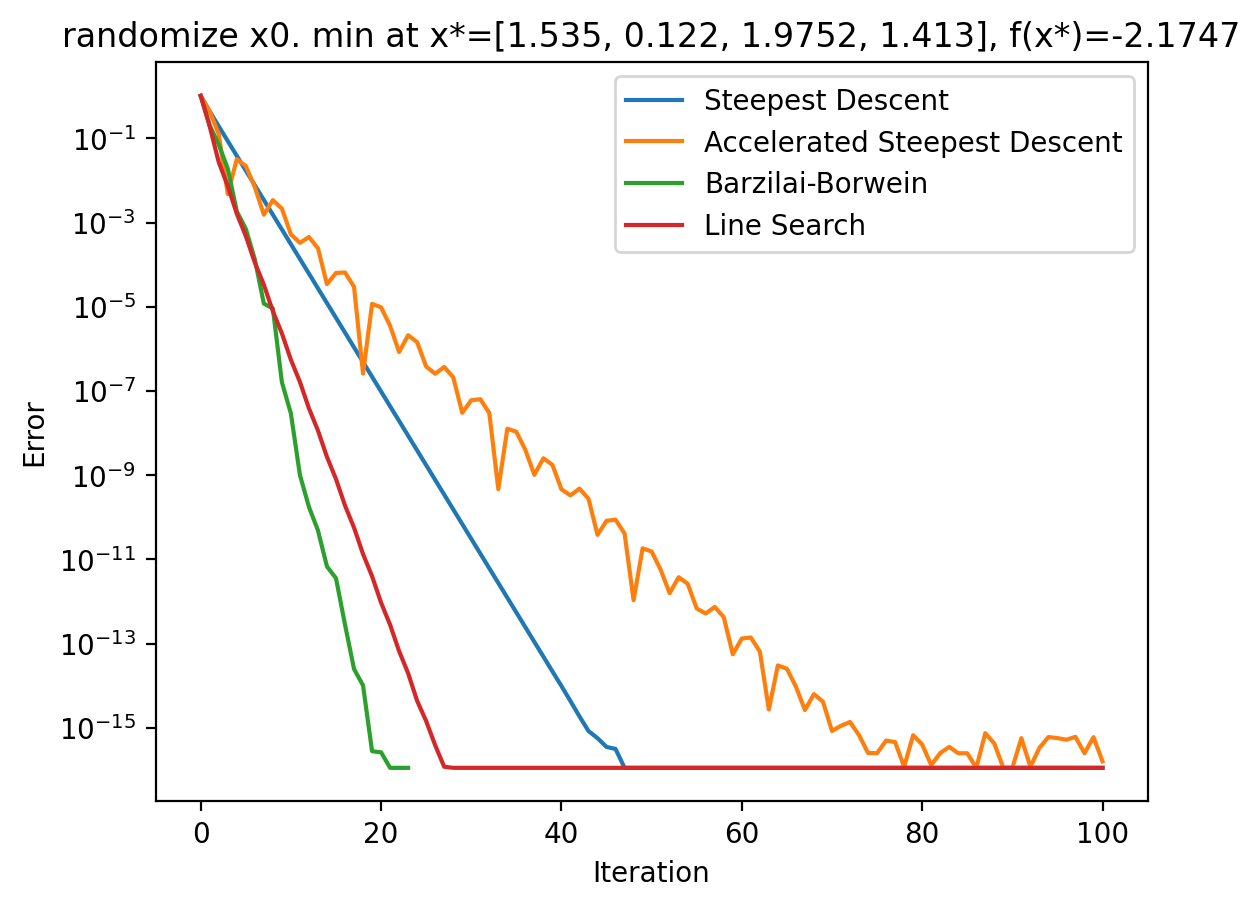

In [4]:
Q = np.array([[.78,-.02, -.12,-.14],[-.02,.86,-.04,.06],[-.12,-.04,.72,-.08],[-.14,.06,-.08,.74]])
b = np.array([.76,.08,1.12,.68])
c = -b
x0 = np.random.random(b.shape)
_, results = steepest(c, Q, x0)
_, results2 = accel_steepest_qp(c, Q, x0)
_, results3 = BBsteepestqp(c, Q, x0)
xmin, results4 = line_steepest(Q, c, x0)
plt.plot(results, label='Steepest Descent')
plt.plot(results2, label='Accelerated Steepest Descent')
plt.plot(results3, label='Barzilai-Borwein')
plt.plot(results4, label='Line Search')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error')
# float only print 4 digits
xmin = np.round(xmin, 4)
plt.title(f"randomize x0. min at x*={list(xmin)}, f(x*)={.5*xmin@Q@xmin+c@xmin:.4f}")
plt.legend()
plt.show()
